In [1]:
# pip install dash

In [2]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from dash import Dash, dcc, html, Input, Output
import plotly.express as px
import pandasql as ps

In [3]:
wuthering_waves_df = pd.read_csv('wuthering_sentiment_google.csv')

## Dataframe

In [4]:
wuthering_waves_df.head(3)

,Unnamed: 0,reviews,review_scores,published_date,published_time,versions,review_sentiment_score,review_sentiment_ratings
0,0,hummmm not bad,4,2025-11-25,17:02:00.000000,Version 2,0.4310,Positive
1,1,I've been enjoy the journey for a year. Thank ...,5,2025-11-25,16:59:36.000000,Version 2,0.6908,Positive
2,2,Is this Wuthering Waves or gathering wives?? A...,1,2025-11-25,16:38:07.000000,Version 2,-0.6440,Negative


## Sentiment Ratio

In [5]:
overall_sentiment_ratio_df = pd.DataFrame(wuthering_waves_df.groupby('review_sentiment_ratings')['review_sentiment_score'].count().reset_index().rename(columns={'review_sentiment_ratings': 'Sentiments', 'review_sentiment_score': 'Counts'}))

In [6]:
overall_sentiment_ratio_df['Percentage'] = 100*(overall_sentiment_ratio_df['Counts']/overall_sentiment_ratio_df['Counts'].sum())

In [7]:
overall_sentiment_ratio_df

,Sentiments,Counts,Percentage
0,Negative,9352,15.318842
1,Neutral,8616,14.113253
2,Positive,43081,70.567904


In [8]:
version_sentiment_ratio_df = pd.DataFrame(wuthering_waves_df.groupby(['versions', 'review_sentiment_ratings'])['review_sentiment_score'].count().reset_index().rename(columns={'versions': 'Versions', 'review_sentiment_ratings': 'Sentiments', 'review_sentiment_score': 'Counts'}))

In [9]:
version_sentiment_ratio_df['Percentage'] = 100*(version_sentiment_ratio_df['Counts']/version_sentiment_ratio_df.groupby('Versions')['Counts'].transform('sum'))

In [10]:
version_sentiment_ratio_df

,Versions,Sentiments,Counts,Percentage
0,Pre-Launch,Negative,238,10.952600
1,Pre-Launch,Neutral,728,33.502071
2,Pre-Launch,Positive,1207,55.545329
3,Version 1,Negative,5682,17.308923
4,Version 1,Neutral,4122,12.556737
5,Version 1,Positive,23023,70.134341
6,Version 2,Negative,3432,13.175170
7,Version 2,Neutral,3766,14.457369
8,Version 2,Positive,18851,72.367461


In [11]:
# For Pie Chart - Pre Launch

pre_sentiment_ratio_df = ps.sqldf("SELECT * FROM version_sentiment_ratio_df WHERE [Versions] == 'Pre-Launch'")

In [12]:
# For Pie Chart - Version 1.0

ver1_sentiment_ratio_df = ps.sqldf("SELECT * FROM version_sentiment_ratio_df WHERE [Versions] == 'Version 1'")

In [13]:
# For Pie Chart - Version 2.0

ver2_sentiment_ratio_df = ps.sqldf("SELECT * FROM version_sentiment_ratio_df WHERE [Versions] == 'Version 2'")

## Score Ratio

In [14]:
overall_score_ratio_df = pd.DataFrame(wuthering_waves_df.groupby('review_scores')['reviews'].count().reset_index().rename(columns={'review_scores':'Review Scores', 'reviews':'Counts'}))

In [15]:
overall_score_ratio_df['Percentage'] = 100*(overall_score_ratio_df['Counts']/overall_score_ratio_df['Counts'].sum())

In [16]:
overall_score_ratio_df

,Review Scores,Counts,Percentage
0,1,8773,14.371365
1,2,2874,4.708002
2,3,3900,6.388730
3,4,5198,8.515030
4,5,40300,66.016873


In [17]:
version_score_ratio_df = pd.DataFrame(wuthering_waves_df.groupby(['versions', 'review_scores'])['reviews'].count().reset_index().rename(columns={'versions':'Versions', 'review_scores':'Review Scores', 'reviews':'Counts'}))

In [18]:
version_score_ratio_df['Percentage'] = 100*(version_score_ratio_df['Counts']/version_score_ratio_df.groupby('Versions')['Counts'].transform('sum'))

In [19]:
version_score_ratio_df.head(3)

,Versions,Review Scores,Counts,Percentage
0,Pre-Launch,1,207,9.530387
1,Pre-Launch,2,45,2.071823
2,Pre-Launch,3,54,2.486188


In [20]:
# Pre-Launch Scores

pre_score_ratio_df = ps.sqldf("SELECT * FROM version_score_ratio_df WHERE [Versions] == 'Pre-Launch'")

In [21]:
# Version 1 Scores

ver1_score_ratio_df = ps.sqldf("SELECT * FROM version_score_ratio_df WHERE [Versions] == 'Version 1'")

In [22]:
# Version 2 Scores
ver2_score_ratio_df = ps.sqldf("SELECT * FROM version_score_ratio_df WHERE [Versions] == 'Version 2'")

## Average Scores

In [23]:
average_scores_versions = pd.DataFrame(wuthering_waves_df.groupby('versions')['review_scores'].mean().reset_index().rename(columns={'versions':'Versions', 'review_scores':'Average Score'}))

In [24]:
average_scores_versions

,Versions,Average Score
0,Pre-Launch,4.476760
1,Version 1,3.944923
2,Version 2,4.196130


## Word Clouds

In [25]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image
from nltk.corpus import stopwords

### I. Word Cloud - Overall

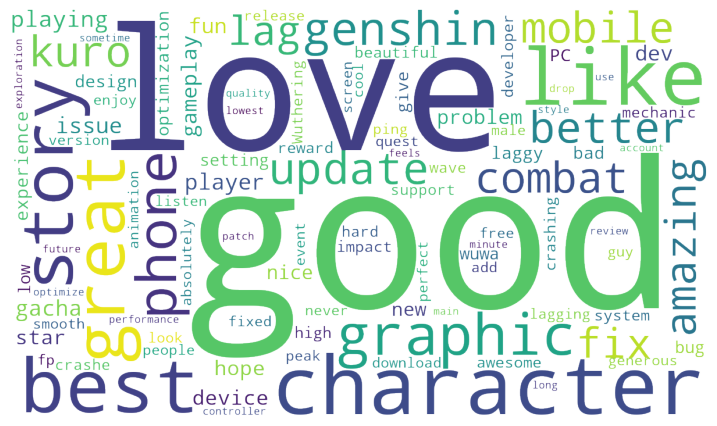

In [26]:
wuthering_waves_df['reviews'] = wuthering_waves_df['reviews'].replace(np.nan, '', regex=True)

reviews = ' '.join(wuthering_waves_df['reviews'])

stop = set(stopwords.words('english'))

custom_stopwords = ["even", 'game', 'thing', 'first', 'still', 'would', 'time', 'get', 'want', 'keep', 'one', 'though',
                    'try', "can't", 'bit', 'please', 'world', 'games', 'many', 'open', 'day', 'also', 'alway', 'well',
                    'lot', 'could', 'since', 'way', 'work', 'got', 'u', 'actually', 'really', 'played', 'every', 'much',
                    'ever', 'always', 'run', 'play', 'pretty', 'getting', 'us', 'im', 'already', 'back', 'start', 'make',
                    'say', 'made', 'especially', 'need', 'think', 'everything', 'far', 'know', 'end', 'overall', 'keeps',
                    'see', 'feel', 'thank', 'pls', 'take', 'needs', 'pull', 'without']

extended_stopwords = stop.union(custom_stopwords)

# mask1 = np.array(Image.open("bubble_crop2.png"))

# mask1[mask1 == 0] = 255

overall_wordcloud = WordCloud(width=1200, height=700, max_words=100, stopwords=extended_stopwords , background_color="rgba(255, 255, 255, 0)", mode="RGBA", collocations=False).generate(reviews)

overall_wordcloud.words_

# Display the generated image:
plt.figure(figsize=(9,9))
plt.imshow(overall_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### II. Word Cloud - Pre-Launch

In [27]:
prelaunch_word_df = ps.sqldf("SELECT * FROM wuthering_waves_df WHERE [versions] == 'Pre-Launch'")

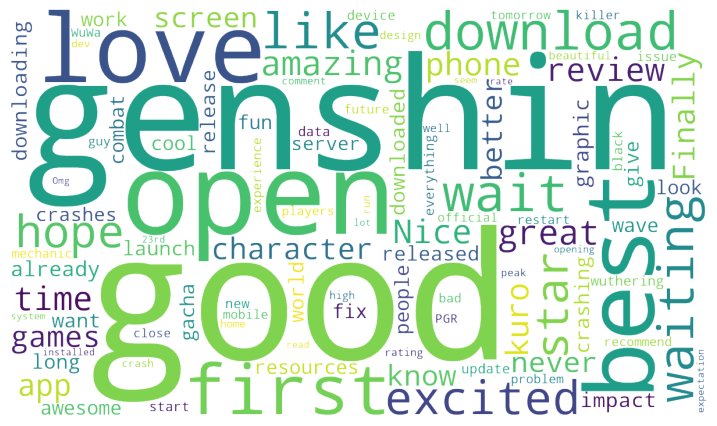

In [28]:
prelaunch_word_df

reviews_pre = ' '.join(prelaunch_word_df['reviews'])

stop = set(stopwords.words('english'))

custom_stopwords = ["gonna", 'looking', 'gameplay', 'tho', 'see', 'gb', 'come', 'yet', 'could', 'im',
                    'go', 'may', 'back', 'tried', 'also', 'still', 'playing', 'please', 'even', 'always',
                    'thing', 'really', 'much', 'make', 'day', "can't", 'thank', 'try', 'player', 'u',
                    'keep', 'going', 'need', 'got', 'get', 'pre', 'would', 'let', 'ever', 'cant', 'say',
                    'yes', 'year', 'actually', 'since', 'one', 'play','game', 'played', 'think', 'absolutely',
                    'days', 'keeps', 'far', 'many', 'every']

extended_stopwords = stop.union(custom_stopwords)

# mask1 = np.array(Image.open("bubble_crop2.png"))

# mask1[mask1 == 0] = 255

prelaunch_wordcloud = WordCloud(width=1200, height=700, max_words=100, stopwords=extended_stopwords , background_color="rgba(255, 255, 255, 0)", mode="RGBA", collocations=False).generate(reviews_pre)

prelaunch_wordcloud.words_

# Display the generated image:
plt.figure(figsize=(9,9))
plt.imshow(prelaunch_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### III. Word Cloud - Version 1.0

In [29]:
version1_word_df = ps.sqldf("SELECT * FROM wuthering_waves_df WHERE [versions] == 'Version 1'")

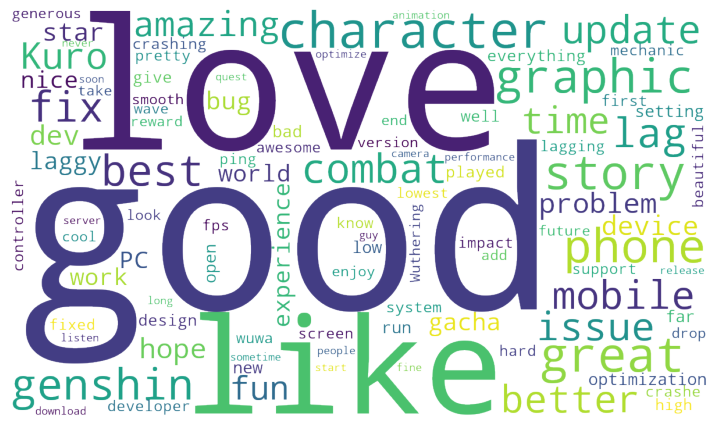

In [30]:
reviews_ver1 = ' '.join(version1_word_df['reviews'])

stop = set(stopwords.words('english'))

custom_stopwords = ["gonna", 'looking', 'gameplay', 'tho', 'see', 'gb', 'come', 'yet', 'could', 'im',
                    'go', 'may', 'back', 'tried', 'also', 'still', 'playing', 'please', 'even', 'always',
                    'thing', 'really', 'much', 'make', 'day', "can't", 'thank', 'try', 'player', 'u',
                    'keep', 'going', 'need', 'got', 'get', 'pre', 'would', 'let', 'ever', 'cant', 'say',
                    'yes', 'year', 'actually', 'since', 'one', 'play', 'game', 'want', 'feel', 'keeps',
                    'games', 'overall', 'bit', 'though', 'lot', 'players', 'needs', 'think', 'us', 'way',
                    'already', 'every', 'minute', 'getting', 'especially', 'many', 'pls']

extended_stopwords = stop.union(custom_stopwords)

# mask1 = np.array(Image.open("bubble_crop2.png"))

# mask1[mask1 == 0] = 255

version1_wordcloud = WordCloud(width=1200, height=700, max_words=100, stopwords=extended_stopwords , background_color="rgba(255, 255, 255, 0)", mode="RGBA", collocations=False).generate(reviews_ver1)

version1_wordcloud.words_

# Display the generated image:
plt.figure(figsize=(9,9))
plt.imshow(version1_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### IV. Word Cloud - Version 2.0

In [31]:
version2_word_df = ps.sqldf("SELECT * FROM wuthering_waves_df WHERE [versions] == 'Version 2'")

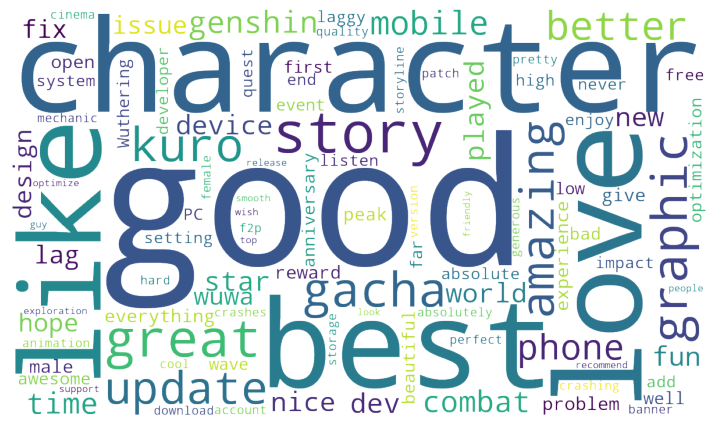

In [32]:
reviews_ver2 = ' '.join(version2_word_df['reviews'])

stop = set(stopwords.words('english'))

custom_stopwords = ["gonna", 'looking', 'gameplay', 'tho', 'see', 'gb', 'come', 'yet', 'could', 'im',
                    'go', 'may', 'back', 'tried', 'also', 'still', 'playing', 'please', 'even', 'always',
                    'thing', 'really', 'much', 'make', 'day', "can't", 'thank', 'try', 'player', 'u',
                    'keep', 'going', 'need', 'got', 'get', 'pre', 'would', 'let', 'ever', 'cant', 'say',
                    'yes', 'year', 'actually', 'since', 'one', 'play', 'game', 'want', 'feel', 'keeps',
                    'games', 'overall', 'bit', 'though', 'lot', 'players', 'needs', 'think', 'us', 'way',
                    'already', 'every', 'minute', 'getting', 'especially', 'many', 'pls', 'run', 'without',
                    'know', 'making', 'feels', 'main', 'pull', 'take', 'work', 'made']

extended_stopwords = stop.union(custom_stopwords)

# mask1 = np.array(Image.open("bubble_crop2.png"))

# mask1[mask1 == 0] = 255

version2_wordcloud = WordCloud(width=1200, height=700, max_words=100, stopwords=extended_stopwords , background_color="rgba(255, 255, 255, 0)", mode="RGBA", collocations=False).generate(reviews_ver2)

version2_wordcloud.words_

# Display the generated image:
plt.figure(figsize=(9,9))
plt.imshow(version2_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Keywords

In [33]:
# Keywords - Overall

overall_word_frequency = overall_wordcloud.words_

overall_frequency = pd.DataFrame(list(overall_word_frequency.items()), columns=['Words', 'Frequency']) 

overall_frequency

# word_frequency_born_again.to_csv('word_frequency_born_again.csv')

,Words,Frequency
0,good,1.000000
1,love,0.660893
2,character,0.652390
3,like,0.612235
4,best,0.561058
...,...,...
95,controller,0.067239
96,patch,0.066845
97,minute,0.066766
98,use,0.064641


In [34]:
# Keywords - Pre Launch

pre_word_frequency = prelaunch_wordcloud.words_

pre_frequency = pd.DataFrame(list(pre_word_frequency.items()), columns=['Words', 'Frequency']) 

pre_frequency

,Words,Frequency
0,good,1.000000
1,genshin,0.759657
2,open,0.643777
3,love,0.630901
4,best,0.626609
...,...,...
95,installed,0.064378
96,read,0.064378
97,23rd,0.064378
98,Omg,0.064378


In [35]:
# Keywords - Version 1.0

ver1_word_frequency = version1_wordcloud.words_

ver1_frequency = pd.DataFrame(list(ver1_word_frequency.items()), columns=['Words', 'Frequency']) 

ver1_frequency

,Words,Frequency
0,good,1.000000
1,love,0.631723
2,like,0.617800
3,character,0.547775
4,great,0.507508
...,...,...
95,download,0.075758
96,optimize,0.075348
97,camera,0.075212
98,soon,0.073437


In [36]:
# Keywords - Version 2.0

ver2_word_frequency = version2_wordcloud.words_

ver2_frequency = pd.DataFrame(list(ver2_word_frequency.items()), columns=['Words', 'Frequency']) 

ver2_frequency

,Words,Frequency
0,good,1.000000
1,character,0.819525
2,best,0.737651
3,love,0.703812
4,like,0.611824
...,...,...
95,people,0.067095
96,look,0.066317
97,guy,0.065928
98,wish,0.063594


## Review Sentiment Distribution by Versions - Pie Chart

In [37]:
# Review Sentiment Distribution by Versions - Pie Chart

versions = ['Overall', 'Pre Launch', 'Version 1.0', 'Version 2.0']

sentiment_fig = go.Figure()

# Add traces for each version
sentiment_fig.add_trace(go.Pie(
    labels=overall_sentiment_ratio_df['Sentiments'],
    values=overall_sentiment_ratio_df['Counts'],
    name='Overall',
    visible=True
))

sentiment_fig.add_trace(go.Pie(
    labels=pre_sentiment_ratio_df['Sentiments'],
    values=pre_sentiment_ratio_df['Counts'],
    name='Pre-Launch',
    visible=False
))

sentiment_fig.add_trace(go.Pie(
    labels=ver1_sentiment_ratio_df['Sentiments'],
    values=ver1_sentiment_ratio_df['Counts'],
    name='Version 1.0',
    visible=False
))

sentiment_fig.add_trace(go.Pie(
    labels=ver2_sentiment_ratio_df['Sentiments'],
    values=ver2_sentiment_ratio_df['Counts'],
    name='Version 2.0',
    visible=False
))

# Dropdown Menu
sentiment_fig.update_layout(
    updatemenus=[
        dict(
            buttons=[
                dict(
                    label='Overall',
                    method='update',
                    args=[{'visible': [True, False, False, False]}]
                ),
                dict(
                    label='Pre-Launch',
                    method='update',
                    args=[{'visible': [False, True, False, False]}]
                ),
                dict(
                    label='Version 1.0',
                    method='update',
                    args=[{'visible': [False, False, True, False]}]
                ),
                dict(
                    label='Version 2.0',
                    method='update',
                    args=[{'visible': [False, False, False, True]}]
                )
            ],
            direction="down"
        )
    ],
    title="Review Sentiment Distribution by Version"
)

sentiment_fig.show()


## Average Score by Version - Bar Chart (Vertical)

In [38]:
# Average Score Trend by Version

avg_fig = go.Figure()

avg_fig = px.bar(average_scores_versions,
                 x='Versions',
                 y=np.round(average_scores_versions['Average Score'], decimals=1),
                 hover_data=['Versions', 'Average Score'],
                 color='Average Score',
                 labels={'Versions':'Versions', 'y':''},
                 text=np.round(average_scores_versions['Average Score'], decimals=1),
                 title='Average Score by Version')

avg_fig.update_traces(width=.5)

avg_fig.show()

## Score Distribution by Versions - Bar Chart (Horizontal)

In [39]:
# Benchmarked from Amazon, Apple Reviews

versions_score = ['Overall', 'Pre Launch', 'Version 1.0', 'Version 2.0']

score_fig = go.Figure()

# Add traces for each version
score_fig.add_trace(go.Bar(
    y=overall_score_ratio_df['Review Scores'],
    x=np.round(overall_score_ratio_df['Percentage'], decimals=1),
    name='Overall',
    orientation='h',
    visible=True,
    text=np.round(overall_score_ratio_df['Percentage'], decimals=1),
    texttemplate = "%{text}%",
    textposition = "inside"
))

score_fig.add_trace(go.Bar(
    y=pre_score_ratio_df['Review Scores'],
    x=np.round(pre_score_ratio_df['Percentage'], decimals=1),
    name='Pre-Launch',
    orientation='h',
    visible=True,
    text=np.round(pre_score_ratio_df['Percentage'], decimals=1),
    texttemplate = "%{text}%",
    textposition = "inside"
))

score_fig.add_trace(go.Bar(
    y=ver1_score_ratio_df['Review Scores'],
    x=np.round(ver1_score_ratio_df['Percentage'], decimals=1),
    name='Version 1.0',
    orientation='h',
    visible=True,
    text=np.round(ver1_score_ratio_df['Percentage'], decimals=1),
    texttemplate = "%{text}%",
    textposition = "inside"
))

score_fig.add_trace(go.Bar(
    y=ver2_score_ratio_df['Review Scores'],
    x=np.round(ver2_score_ratio_df['Percentage'], decimals=1),
    name='Version 2.0',
    orientation='h',
    visible=True,
    text=np.round(ver2_score_ratio_df['Percentage'], decimals=1),
    texttemplate = "%{text}%",
    textposition = "inside"
))

# Dropdown Menu
score_fig.update_layout(
    updatemenus=[
        dict(
            buttons=[
                dict(
                    label='Overall',
                    method='update',
                    args=[{'visible': [True, False, False, False]}]
                ),
                dict(
                    label='Pre-Launch',
                    method='update',
                    args=[{'visible': [False, True, False, False]}]
                ),
                dict(
                    label='Version 1.0',
                    method='update',
                    args=[{'visible': [False, False, True, False]}]
                ),
                dict(
                    label='Version 2.0',
                    method='update',
                    args=[{'visible': [False, False, False, True]}]
                )
            ],
            direction="down"
        )
    ],
    title="Score Distribution by Version"
)

score_fig.show()

## Top 10 Keywords by Version - Excluding Stop Words

In [40]:
# First, need to sort them into top 10 in descending

overall_top10 = overall_frequency.sort_values('Frequency', ascending=False).head(10).iloc[::-1]
pre_top10 = pre_frequency.sort_values('Frequency', ascending=False).head(10).iloc[::-1]
ver1_top10 = ver1_frequency.sort_values('Frequency', ascending=False).head(10).iloc[::-1]
ver2_top10 = ver2_frequency.sort_values('Frequency', ascending=False).head(10).iloc[::-1]

# Benchmarked from Amazon, Apple Reviews

keyword_versions = ['Overall', 'Pre Launch', 'Version 1.0', 'Version 2.0']
	
keyword_fig = go.Figure()

# Add traces for each version
keyword_fig.add_trace(go.Bar(
    y=overall_top10['Words'],
    x=overall_top10['Frequency'],
    name='Overall',
    orientation='h',
    visible=True
))

keyword_fig.add_trace(go.Bar(
    y=pre_top10['Words'],
    x=pre_top10['Frequency'],
    name='Pre-Launch',
    orientation='h',
    visible=True
))

keyword_fig.add_trace(go.Bar(
    y=ver1_top10['Words'],
    x=ver1_top10['Frequency'],
    name='Version 1.0',
    orientation='h',
    visible=True
))

keyword_fig.add_trace(go.Bar(
    y=ver2_top10['Words'],
    x=ver2_top10['Frequency'],
    name='Version 2.0',
    orientation='h',
    visible=True
))

# Dropdown Menu
keyword_fig.update_layout(
    updatemenus=[
        dict(
            buttons=[
                dict(
                    label='Overall',
                    method='update',
                    args=[{'visible': [True, False, False, False]}]
                ),
                dict(
                    label='Pre-Launch',
                    method='update',
                    args=[{'visible': [False, True, False, False]}]
                ),
                dict(
                    label='Version 1.0',
                    method='update',
                    args=[{'visible': [False, False, True, False]}]
                ),
                dict(
                    label='Version 2.0',
                    method='update',
                    args=[{'visible': [False, False, False, True]}]
                )
            ],
            direction="down"
        )
    ],
    title="Top 10 Keywords by Version - Excluding Stop Words"
)

keyword_fig.show()